<h1 style="font-size:50px"><center> 🤑Prediction Of Tip Using Machine Learning And Deep Learning 🤑</center></h1>


<h2 style="color:#159364"><center>thanks for visisting my notebook</center></h2>


<center><img src="https://media.giphy.com/media/5t235Nf4wo3rhLSMVy/giphy.gif"></center>


<div style="background-color:#fff1cc; padding: 20px;">
<p style="font-size:20px; font-family:verdana; line-height: 1.7em">Prediction of tip using the machine learning and deep learning.Various algorithms applied on the data and with the help of it predict the amount of tip paid to hotel.Data analysis done on the dataset and try to find various factor that effect the result </p>

# importing the libraries

<p style  background-color:#>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tipping/tips.csv


# import dataset

In [2]:
data=pd.read_csv("/kaggle/input/tipping/tips.csv")
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# data cleaning and processing

In [3]:
data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [5]:
data.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [6]:
data.shape

(244, 7)

In [7]:
data.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [8]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# exploratory data analysis 

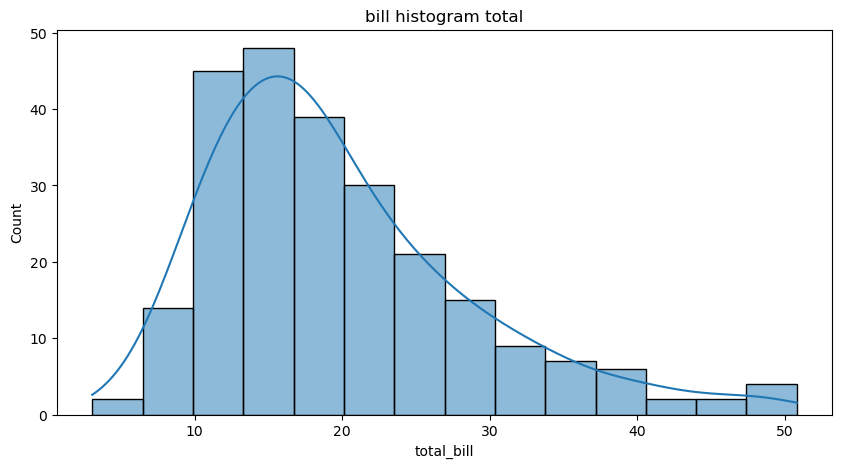

In [9]:
plt.figure(figsize=(10,5))
sns.histplot(data["total_bill"],kde="True")
plt.title("bill histogram total")
plt.show()

In [10]:
#plotly is used to pie chart
a=px.pie(data,"sex",title="gender ratio in bill")
a.show()

In [11]:
bill_mean=data[data["total_bill"]>data["total_bill"].mean()]
a=px.pie(bill_mean,"sex",title="gender ratio in bill more than avarage")
a.show()

In [12]:
a=px.pie(data,values="tip",names="day",title="amount of tips in different days")
a.show()

In [13]:
a=px.pie(data,values="tip",names="smoker",title="amount of tips by smoker and non smokers")
a.show()

In [14]:
df = px.data.tips()
fig = px.scatter(df, x="total_bill", y="tip", color="smoker", facet_col="sex", facet_row="time")
fig.show()

In [15]:
df = px.data.tips()
fig = px.scatter(df, x="total_bill", y="tip", trendline="ols")
fig.show()

In [16]:
a=px.bar(data,x="sex",y="total_bill",color="time")
a.show()

In [17]:
a=px.bar(data,x="sex",y="total_bill",color="smoker")
a.show()

In [18]:
import plotly.express as px
df = px.data.tips()
fig = px.bar(df, x="sex", y="total_bill", color="smoker", barmode="group",
             facet_row="time", facet_col="day",
             category_orders={"day": ["Thur", "Fri", "Sat", "Sun"],
                              "time": ["Lunch", "Dinner"]})
fig.show()

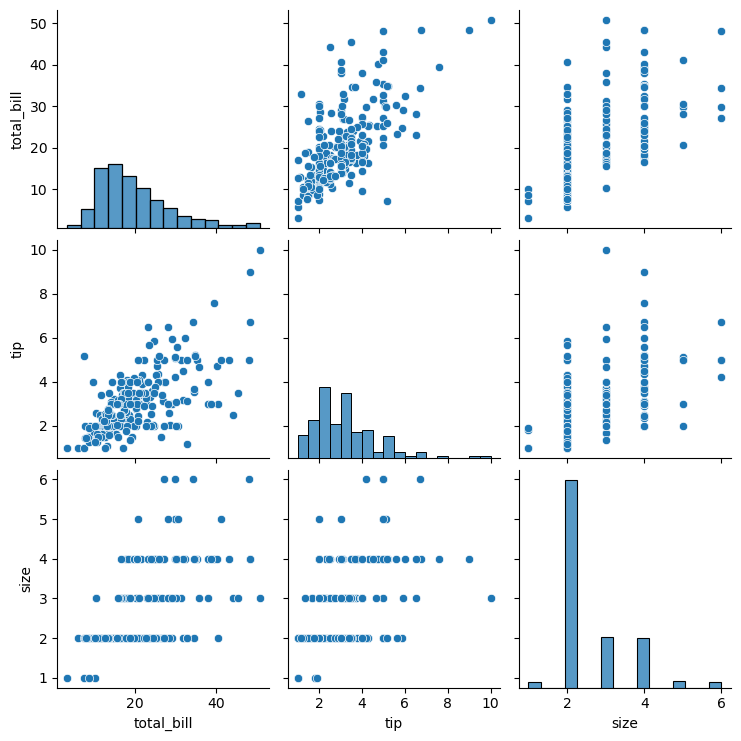

In [19]:
sns.pairplot(data)
plt.show()

In [20]:
columns_factorized=["sex","smoker","day","time"]
for i in columns_factorized:
    data[i]=pd.factorize(data[i])[0]
data.head()    

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,0,0,2
1,10.34,1.66,1,0,0,0,3
2,21.01,3.50,1,0,0,0,3
3,23.68,3.31,1,0,0,0,2
4,24.59,3.61,0,0,0,0,4


# training the model 👷

In [21]:
x=data.drop("tip",axis=1)
y=data["tip"]

from sklearn import preprocessing
from sklearn import utils
import warnings
warnings.filterwarnings("ignore")

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y = lab.fit_transform(y)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=(0.2))
x_train.head()

,total_bill,sex,smoker,day,time,size
170,50.81,1,1,1,0,3
51,10.29,0,0,0,0,2
34,17.78,1,0,1,0,2
70,12.02,1,0,1,0,2
192,28.44,1,1,2,1,2


# Linear regreassion

In [22]:
from sklearn.linear_model import LinearRegression
le=LinearRegression()
le.fit(x_train,y_train)
print(le.score(x_test,y_test))


0.38005944176480233


In [23]:
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression


X = data.total_bill.values.reshape(-1, 1)

model = LinearRegression()
model.fit(X, data.tip)

x_range = np.linspace(X.min(), X.max(), 100)
x_range
y_range = model.predict(x_range.reshape(-1, 1))
y_range
fig = px.scatter(data, x='total_bill', y='tip', opacity=0.65)
fig.add_traces(go.Scatter(x=x_range, y=y_range, name='Regression Fit'))
fig.show()


# Support Vector Machine

In [24]:
from sklearn.svm import SVC
le=SVC()
le.fit(x_train,y_train)
print(le.score(x_test,y_test))

0.14285714285714285


In [25]:
X = data.total_bill.values.reshape(-1, 1)

lab = preprocessing.LabelEncoder()
y = lab.fit_transform(data.tip)



model = SVC()
model.fit(X, y)

x_range = np.linspace(X.min(), X.max(), 100)
x_range
y_range = model.predict(x_range.reshape(-1, 1))
y_range
fig = px.scatter(data, x='total_bill', y='tip', opacity=0.65)
fig.add_traces(go.Scatter(x=x_range, y=y_range, name='svm'))
fig.show()


# Decision Tree 

In [26]:
from sklearn.tree import DecisionTreeClassifier
le=DecisionTreeClassifier()
le.fit(x_train,y_train)
le.score(x_test,y_test)

0.08163265306122448

In [27]:
model = DecisionTreeClassifier()
model.fit(X, y)

x_range = np.linspace(X.min(), X.max(), 100)
x_range
y_range = model.predict(x_range.reshape(-1, 1))
y_range
fig = px.scatter(data, x='total_bill', y='tip', opacity=0.65)
fig.add_traces(go.Scatter(x=x_range, y=y_range, name='DecisionTreeClassifier'))
fig.show()


# Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
le=RandomForestClassifier()
le.fit(x_train,y_train)
le.score(x_test,y_test)

0.10204081632653061

In [29]:
model = RandomForestClassifier()
model.fit(X, y)

x_range = np.linspace(X.min(), X.max(), 100)
x_range
y_range = model.predict(x_range.reshape(-1, 1))
y_range
fig = px.scatter(data, x='total_bill', y='tip', opacity=0.65)
fig.add_traces(go.Scatter(x=x_range, y=y_range, name='RandomForestClassifier'))
fig.show()


# KNeighborsClassifier

In [30]:
from sklearn.neighbors import KNeighborsClassifier
le=KNeighborsClassifier()
le.fit(x_train,y_train)
le.score(x_test,y_test)

0.04081632653061224

# Deep Learning

In [31]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [39]:
model = Sequential([
    Dense(32, activation = 'relu', input_shape = (x_train.shape[1],)),
    Dropout(0.1),
    Dense(32, activation = 'relu'),
    Dropout(0.5),
    Dense(1, activation = 'sigmoid')
])

In [41]:
model.compile(loss = 'mse', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                224       
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,313
Trainable params: 1,313
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.fit(x_train, y_train, epochs = 20, batch_size = 16, validation_data = (x_test, y_test))

Epoch 1/20
13/13 [==============================] - 1s 19ms/step - loss: 4491.0068 - accuracy: 0.0103 - val_loss: 3639.3660 - val_accuracy: 0.0000e+00
Epoch 2/20
13/13 [==============================] - 0s 5ms/step - loss: 4473.5142 - accuracy: 0.0051 - val_loss: 3638.9236 - val_accuracy: 0.0000e+00
Epoch 3/20
13/13 [==============================] - 0s 6ms/step - loss: 4469.5190 - accuracy: 0.0051 - val_loss: 3638.8706 - val_accuracy: 0.0000e+00
Epoch 4/20
13/13 [==============================] - 0s 5ms/step - loss: 4468.0181 - accuracy: 0.0103 - val_loss: 3638.8584 - val_accuracy: 0.0000e+00
Epoch 5/20
13/13 [==============================] - 0s 5ms/step - loss: 4467.3726 - accuracy: 0.0051 - val_loss: 3638.8530 - val_accuracy: 0.0000e+00
Epoch 6/20
13/13 [==============================] - 0s 6ms/step - loss: 4468.5161 - accuracy: 0.0051 - val_loss: 3638.8491 - val_accuracy: 0.0000e+00
Epoch 7/20
13/13 [==============================] - 0s 5ms/step - loss: 4467.2656 - accuracy: 0.005

In [43]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

2/2 [==============================] - 0s 6ms/step - loss: 3638.8374 - accuracy: 0.0000e+00
Test loss: 3638.8374
Test accuracy: 0.0000


<h1><center style="font-size:50px ">Not Satisfied</center><h1>
    
    
<center> <img src="https://media.giphy.com/media/9Y5BbDSkSTiY8/giphy.gif"></center>    
    